In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [5]:
# previous semistor: 535 instances, 21 features

df = pd.read_csv("../../Resources/data_set_535_ano_sankee.csv")

print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=3, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=3, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(535, 21)
lr 0.03585991005773603
rf 0.3976563207905847
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      535 non-null    int64  
 1   price         535 non-null    int64  
 2   beds          535 non-null    int64  
 3   baths         535 non-null    int64  
 4   house_size    535 non-null    float64
 5   land_size     535 non-null    float64
 6   New           535 non-null    int64  
 7   Garden        535 non-null    int64  
 8   Security      535 non-null    int64  
 9   AC            535 non-null    int64  
 10  Near Service  535 non-null    int64  
 11  Stories       535 non-null    int64  
 12  Parking       535 non-null    int64  
 13  Luxury        535 non-null    int64  
 14  Pantry        535 non-null    int64  
 15  Hot Water     535 non-null    int64  
 16  Roller Gate   535 non-null    int64  
 17  CCTV          535 

In [8]:
# previous semistor: 535 instances, 6 features

df = pd.read_csv("../../Resources/data_set_535_ano_sanke.csv")

print(df.shape)

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=3, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=3, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

FileNotFoundError: [Errno 2] File ../../Resources/data_set_535_ano_sanke.csv does not exist: '../../Resources/data_set_535_ano_sanke.csv'

In [11]:
# instances: 7577, features: 6
import pandas as pd
df = pd.read_csv("../../Resources/house_data_set_cleaned_3.csv")

X = df.drop('price', axis = 1)
y = df['price']

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=10, scoring = 'r2')
print("Result")
print("------")
print('Linear Regression:', np.mean(scores_l))
print('Random Forest: ', np.mean(scores_r))

Result
------
Linear Regression: 0.4085045159117596
Random Forest:  0.7021236140158067


In [6]:
# One hot encoding
# instances: 7577, features: 6

df = pd.read_csv("../../Resources/house_data_set_cleaned_3.csv")
    
dummies = pd.get_dummies(df.location)
merged = pd.concat([df, dummies], axis='columns')
df = merged.drop(['location', 39], axis='columns')

df.to_csv("../house_data_colombo.csv", index = False)

df = pd.read_csv("../house_data_colombo.csv")
print(df.shape)

X = df.drop("price", axis = 1)
y = df.price

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

scores_l = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores_r = cross_val_score(rf, X, y, cv=10, scoring = 'r2')
print('lr', np.mean(scores_l))
print('rf', np.mean(scores_r))

(7577, 44)
lr 0.6061521742823847
rf 0.7015190853696445


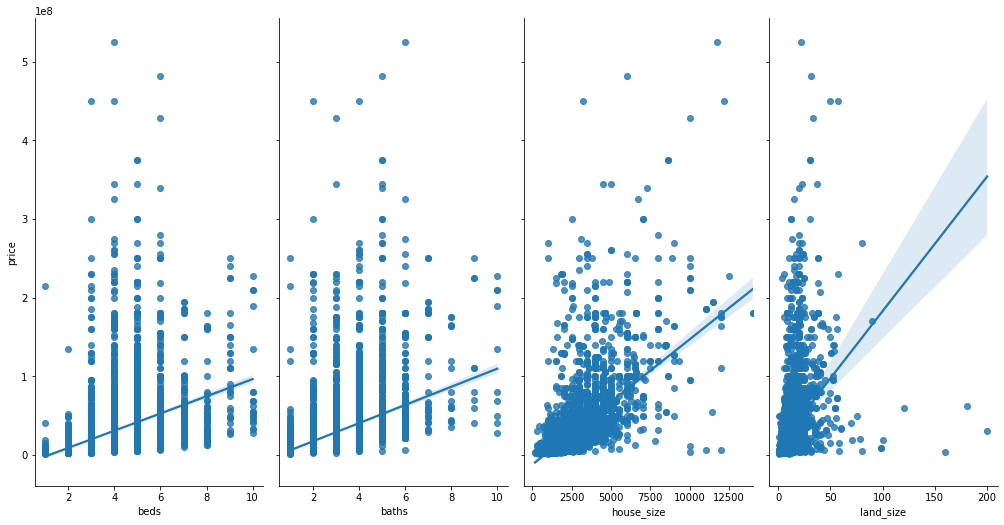

In [7]:
sns.pairplot(df, x_vars=['beds', 'baths', 'house_size', 'land_size'], y_vars='price', height=7, aspect=0.5, kind='reg')

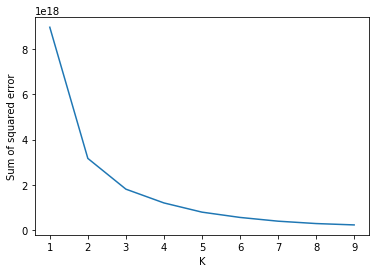

In [8]:
# Elbow method
# Finding k value

import matplotlib.pyplot as plt
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [13]:
# Removing outliers by clustering

df = pd.read_csv("../../Resources/house_data_set_cleaned_3.csv")

km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
df['cluster'] = y_predicted
df.to_csv('../../Resources/house_data_colombo_with_cluster_feature.csv', index = False)
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

print('cluster1', df1.shape)
print('cluster2', df2.shape)
print('cluster3', df3.shape)

lr = linear_model.LinearRegression()
rf = RandomForestRegressor()

X1 = df1.drop('price', axis = 1).drop('cluster', axis = 1)
y1 = df1['price']

X2 = df2.drop('price', axis = 1).drop('cluster', axis = 1)
y2 = df2['price']

X3 = df3.drop('price', axis = 1).drop('cluster', axis = 1)
y3 = df3['price']

df1_rc = df1.drop('cluster', axis = 1)
df1_rc.to_csv('../../Resources/house_data_colombo_cluster1.csv', index = False);

df2_rc = df2.drop('cluster', axis = 1)
df2_rc.to_csv('../../Resources/house_data_colombo_cluster2.csv', index = False);

df3_rc = df3.drop('cluster', axis = 1)
df3_rc.to_csv('../../Resources/house_data_colombo_cluster3.csv', index = False);


scores_cluster1_l = cross_val_score(lr, X1, y1, cv=10)
scores_cluster2_l = cross_val_score(lr, X2, y2, cv = 10)
scores_cluster3_l = cross_val_score(lr, X3, y3, cv = 10)

print('cluster1_l:', np.mean(scores_cluster1_l))
print('cluster2_l:', np.mean(scores_cluster2_l))
print('cluster3_l:', np.mean(scores_cluster3_l))

cluster1 (6813, 7)
cluster2 (158, 7)
cluster3 (606, 7)
cluster1_l: 0.5082728090218621
cluster2_l: -0.24071182429446286
cluster3_l: 0.04750422761437785


# Cluster 1

In [4]:
df = pd.read_csv('../../Resources/house_data_colombo_cluster1.csv');
df.describe()

# sns.pairplot(df, x_vars=['beds', 'baths', 'house_size', 'land_size'], y_vars='price', height=7, aspect=0.5, kind='reg')

,location,price,beds,baths,house_size,land_size
count,6813.000000,6.813000e+03,6813.000000,6813.000000,6813.000000,6813.000000
mean,25.249376,2.184571e+07,3.851314,3.011889,2478.316998,9.949441
std,11.620980,1.064403e+07,1.073652,1.119021,994.905373,6.028462
min,0.000000,1.300000e+06,1.000000,1.000000,174.240000,1.000000
25%,20.000000,1.370000e+07,3.000000,2.000000,1650.000000,7.300000
50%,28.000000,2.100000e+07,4.000000,3.000000,2500.000000,9.000000
75%,35.000000,2.850000e+07,4.000000,4.000000,3014.000000,10.500000
max,39.000000,5.150000e+07,10.000000,10.000000,12000.000000,200.000000


# Cluster 2

In [3]:
import pandas as pd
df = pd.read_csv('../../Resources/house_data_colombo_cluster2.csv');
df.describe()

# sns.pairplot(df, x_vars=['beds', 'baths', 'house_size', 'land_size'], y_vars='price', height=7, aspect=0.5, kind='reg')

,location,price,beds,baths,house_size,land_size
count,158.000000,1.580000e+02,158.000000,158.000000,158.000000,158.000000
mean,17.025316,2.095380e+08,5.265823,4.721519,5715.975949,22.233038
std,12.096717,6.663630e+07,1.698323,1.891562,2946.239130,13.323158
min,3.000000,1.475000e+08,1.000000,1.000000,1000.000000,4.000000
25%,4.000000,1.650000e+08,4.000000,3.000000,3500.000000,14.125000
50%,13.000000,1.800000e+08,5.000000,5.000000,5150.000000,20.000000
75%,31.750000,2.293750e+08,6.000000,6.000000,7225.000000,25.000000
max,39.000000,5.250000e+08,10.000000,10.000000,14000.000000,90.000000


# Cluster 3

In [21]:
df = pd.read_csv('../../Resources/house_data_colombo_cluster3.csv');
df.describe()

,location,price,beds,baths,house_size,land_size
count,606.000000,6.060000e+02,606.000000,606.000000,606.000000,606.000000
mean,24.052805,8.128743e+07,4.968647,4.160066,4251.992162,18.637954
std,11.066464,2.401173e+07,1.471719,1.369969,1582.584549,12.460359
min,0.000000,5.200000e+07,2.000000,1.000000,950.000000,4.000000
25%,16.250000,6.025000e+07,4.000000,3.000000,3000.000000,11.200000
50%,27.000000,7.500000e+07,5.000000,4.000000,4000.000000,15.205000
75%,32.000000,9.800000e+07,6.000000,5.000000,5000.000000,21.000000
max,39.000000,1.450000e+08,10.000000,10.000000,12000.000000,181.000000
